In [1]:
%load_ext autoreload
%autoreload 2
from evaluate_numeral_context_new import Evaluator
import pickle
import numpy as np
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# filtered_dataset = pickle.load(open('build/data_filtered_1B.test.pkl','rb'))
filtered_dataset = pickle.load(open('../../data/numeral_context/build/data_filtered_1Bnotable.val.rand.pkl','rb'))
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/word2idx.dat','rb'))

In [3]:
e1 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 600 
dataset examples: 
 [('95.1', ['tone', 'the', 'station', 'rebranded', 'as', 'the', 'edge', 'with', 'new', 'wedj']), ('1297.0', ['suppression', 'of', 'the', 'monastery', 'in', 'by', 'pope', 'boniface', 'viii', 'after']), ('873.0', ['julie', 'andrews', 'camelot', 'ran', 'for', 'performances', 'loewe', 'then', 'decided', 'to']), ('1462.0', ['historical', 'knights', 'of', 'columbus', 'council', 'braintree', 'historical', 'society', 'east', 'braintree']), ('6600.0', ['instructions', 'per', 'second', 'the', 'cdc', 'designed', 'by', 'seymour', 'cray', 'was'])] 
numeral examples : [9.5100000e+01 1.2970000e+03 8.7300000e+02 1.4620000e+03 6.6000000e+03
 7.3680000e-01 2.7300000e+00 4.1786000e+04 2.0112014e+07 1.3540000e+03] 
 


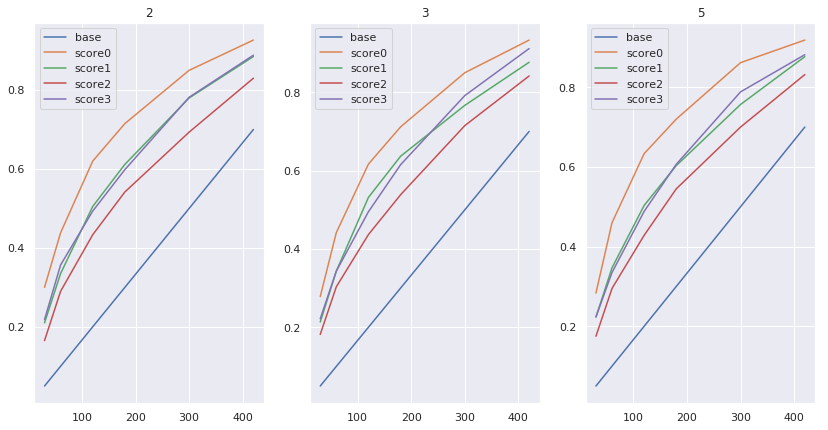

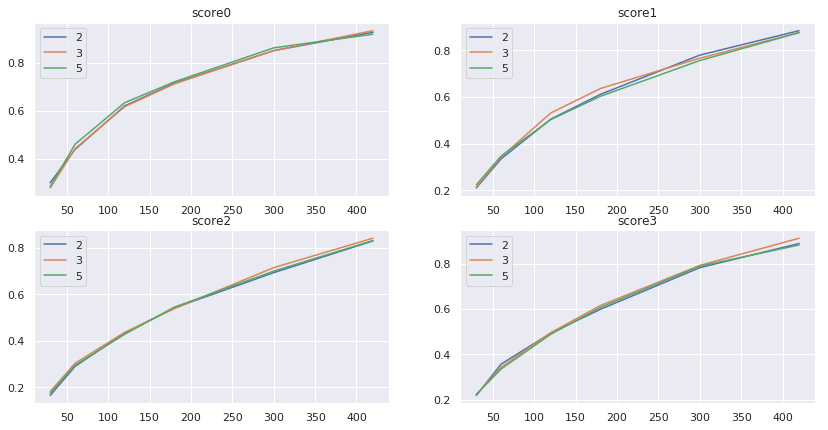

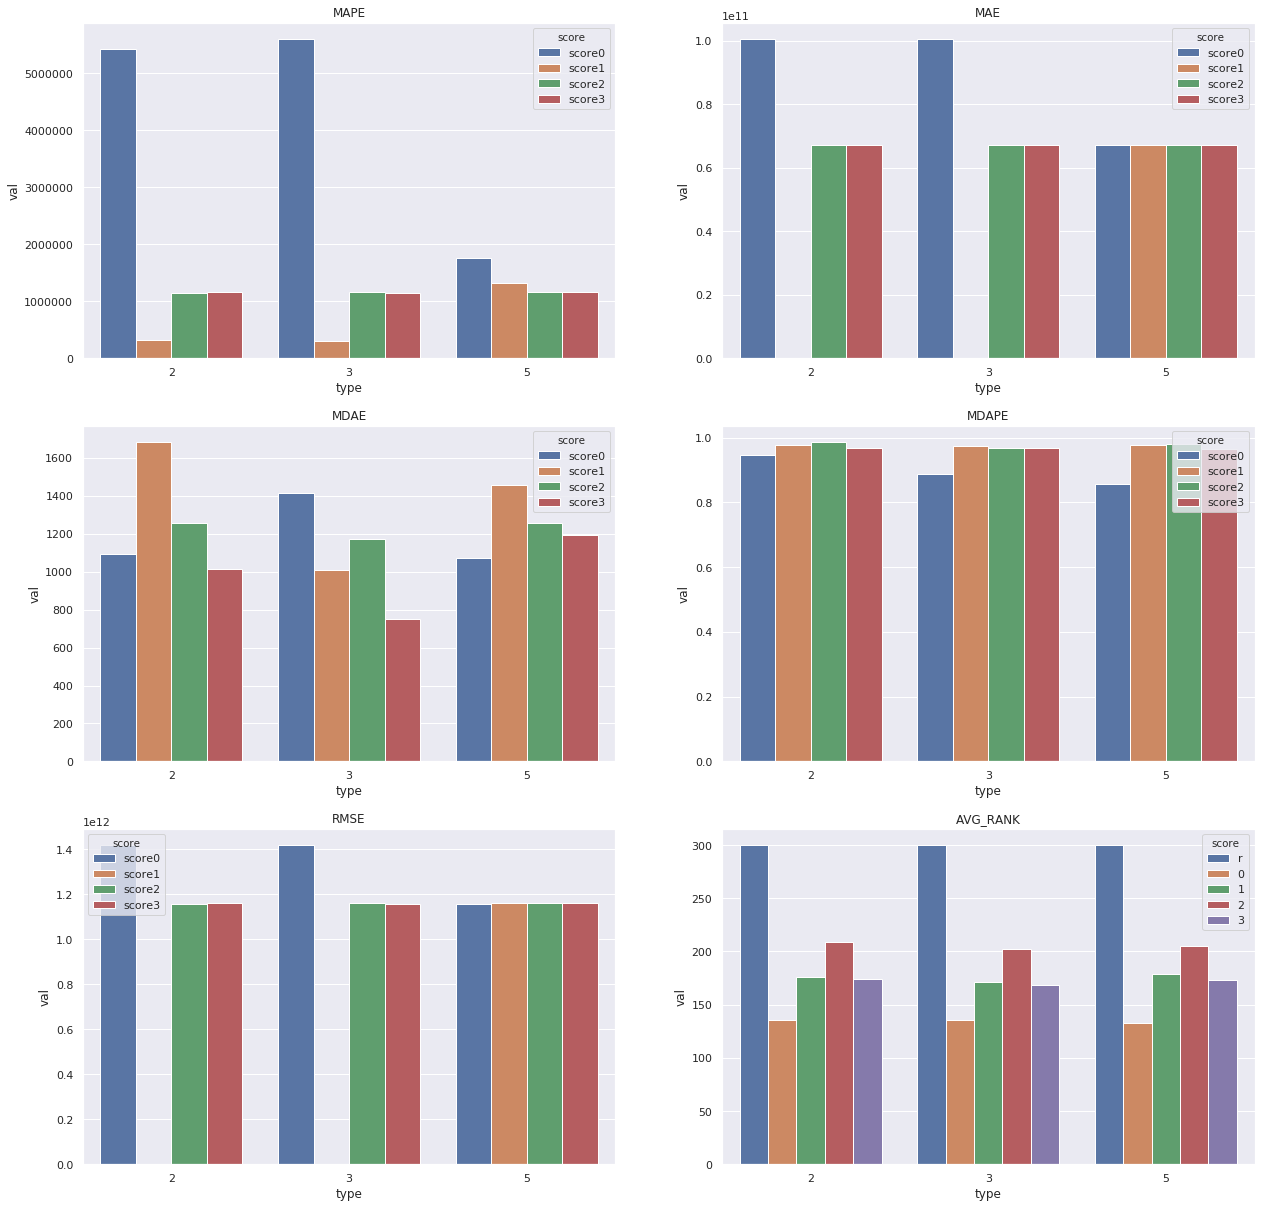

In [4]:
prototype_size = ['2', '3', '5']

res_sz = {}
for sz in prototype_size:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/idx2vec_o_epoch1.dat'.format(sz),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/idx2vec_i_epoch1.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes/{}-0005/trained_prototypes_epoch1_{}00_1.0.dat'.format(sz, sz),'rb'))
    
    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes)
    res_sz[sz] = e1.eval_all(varbose=False)
    
e1.draw(res_sz)

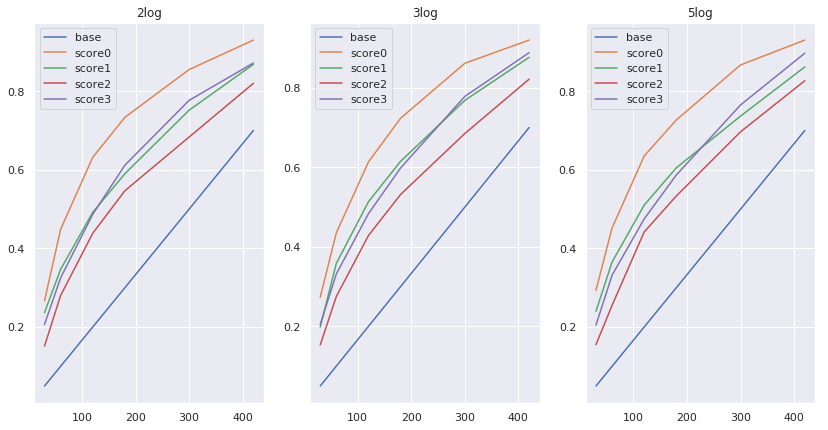

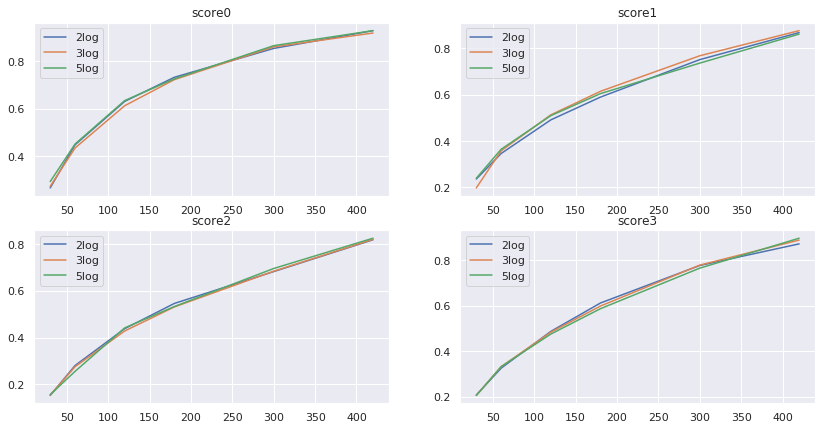

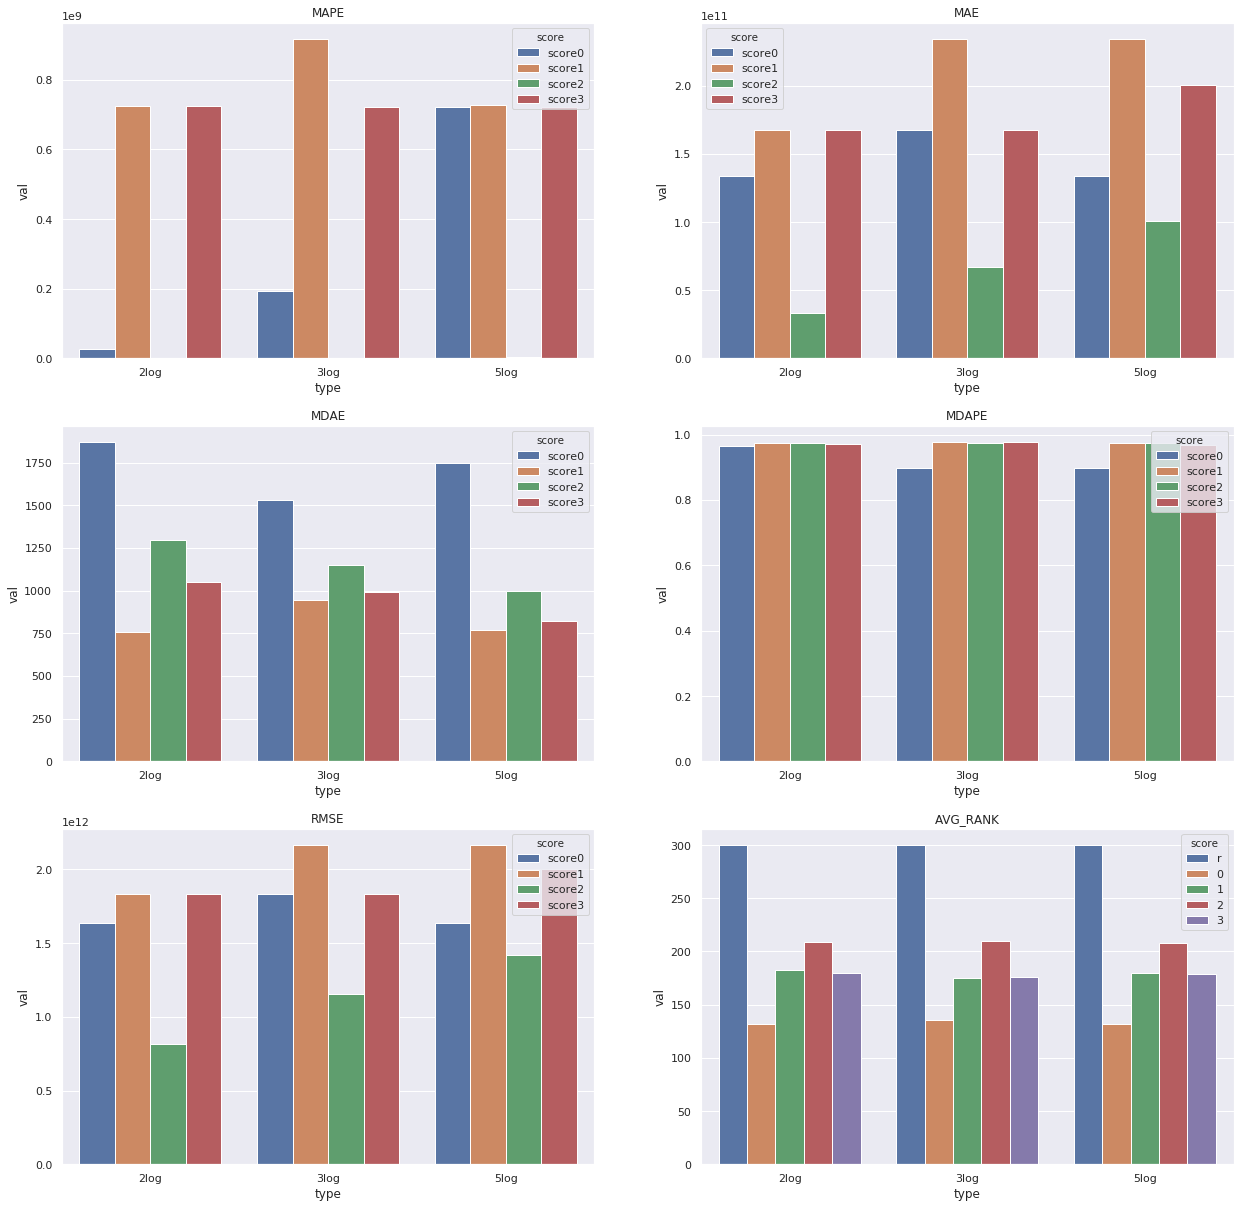

In [5]:
prototype_size = ['2', '3', '5']

res_sz_log = {}
for sz in prototype_size:
    
    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/idx2vec_o_epoch1.dat'.format(sz),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/idx2vec_i_epoch1.dat'.format(sz),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/prototypes_log/{}-0005/trained_prototypes_epoch1_{}00_1.0.dat'.format(sz, sz),'rb'))
    
    e1.load_prototype(idx2vec_i, idx2vec_o, trained_prototypes, log_space=True)
    res_sz_log[sz+'log'] = e1.eval_all(varbose=False)
    
e1.draw(res_sz_log)

In [6]:
e1.flod_score(res_sz, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
2,1.42064e+12,136.008,1.00573e+11,5.42388e+06,1094.94,0.948125,"[0.3, 0.43833333333333335, 0.62, 0.715, 0.85, ...","[30, 60, 120, 180, 300, 420]"
3,1.4185e+12,135.25,1.00438e+11,5.60797e+06,1417.42,0.887166,"[0.2783333333333333, 0.44166666666666665, 0.61...","[30, 60, 120, 180, 300, 420]"
5,1.1582e+12,132.39,6.70051e+10,1.76977e+06,1073.63,0.858566,"[0.2833333333333333, 0.46, 0.6333333333333333,...","[30, 60, 120, 180, 300, 420]"


In [7]:
e1.flod_score(res_sz_log, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
2log,1.63957e+12,132.277,1.33891e+11,2.81255e+07,1872.5,0.965384,"[0.26666666666666666, 0.4483333333333333, 0.63...","[30, 60, 120, 180, 300, 420]"
3log,1.83275e+12,135.138,1.67307e+11,1.93413e+08,1530,0.898171,"[0.2733333333333333, 0.435, 0.6133333333333333...","[30, 60, 120, 180, 300, 420]"
5log,1.63794e+12,132.235,1.33872e+11,7.21977e+08,1750,0.897936,"[0.29333333333333333, 0.45166666666666666, 0.6...","[30, 60, 120, 180, 300, 420]"


In [8]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/LSTM/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/LSTM/idx2vec_i_epoch1.dat','rb'))
LSTM_model_path = '../../data/wikipedia/save/1B30W/LSTM/sgns_epoch1.pt'
e1.load_LSTM(idx2vec_i, idx2vec_o, LSTM_model_path)
res_LSTM = e1.eval_all()
print(res_LSTM)

{'x': [30, 60, 120, 180, 300, 420], 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
        0.7       ],
       [0.04166667, 0.07833333, 0.19166667, 0.29666667, 0.52666667,
        0.73      ],
       [0.05666667, 0.09833333, 0.21333333, 0.32833333, 0.53166667,
        0.71666667],
       [0.07166667, 0.13166667, 0.225     , 0.31833333, 0.51166667,
        0.73833333],
       [0.06333333, 0.1       , 0.20166667, 0.31166667, 0.555     ,
        0.74666667]]), 'RMSE': array([1.63958637e+12, 2.83806637e+12, 1.63958637e+12, 1.63958637e+12]), 'mape': array([2.16885482e+04, 1.09026409e+10, 6.93588577e+03, 1.70445149e+04]), 'mae': array([1.33872863e+11, 4.01364604e+11, 1.33872330e+11, 1.33872448e+11]), 'mdae': array([1715.25   , 1673.12835, 1647.23835, 1630.15   ]), 'mdape': array([0.99834218, 0.99235197, 1.02772215, 0.99409809]), 'avg_rank': [300.5, 294.81333333333333, 289.735, 288.015, 285.3433333333333]}


In [9]:
gmms = ['300', '500']
res_gmm = {}

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-hard/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm/gmm-{}-rd-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm['GMM'+gmm_name+'hard'] = e1.eval_all()

In [10]:
gmms = ['300', '500']

for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms/gmm-{}-rd-soft/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm/gmm-{}-rd-soft.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm)
    res_gmm['GMM'+gmm_name+'soft'] = e1.eval_all()

In [11]:
for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-hard/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm_log/gmm-{}-rd-hard.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm, log_space=True)
    res_gmm['GMM'+gmm_name+'hard-log'] = e1.eval_all()
    

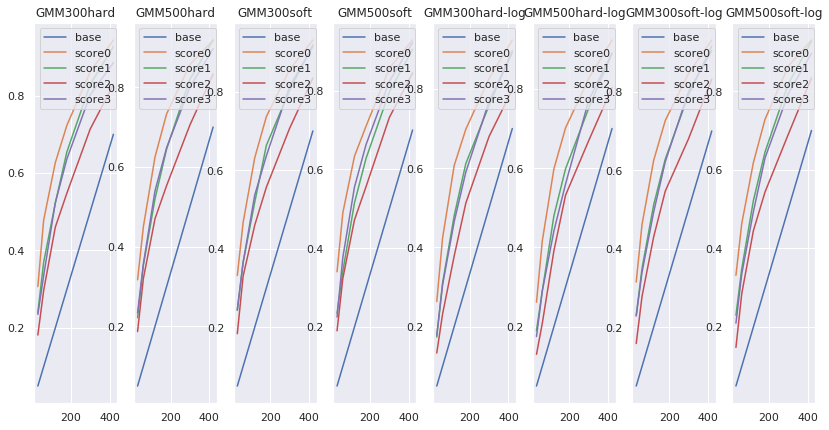

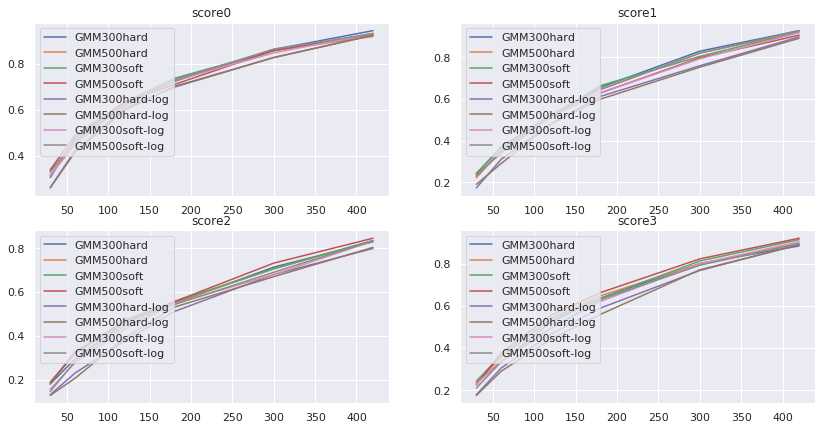

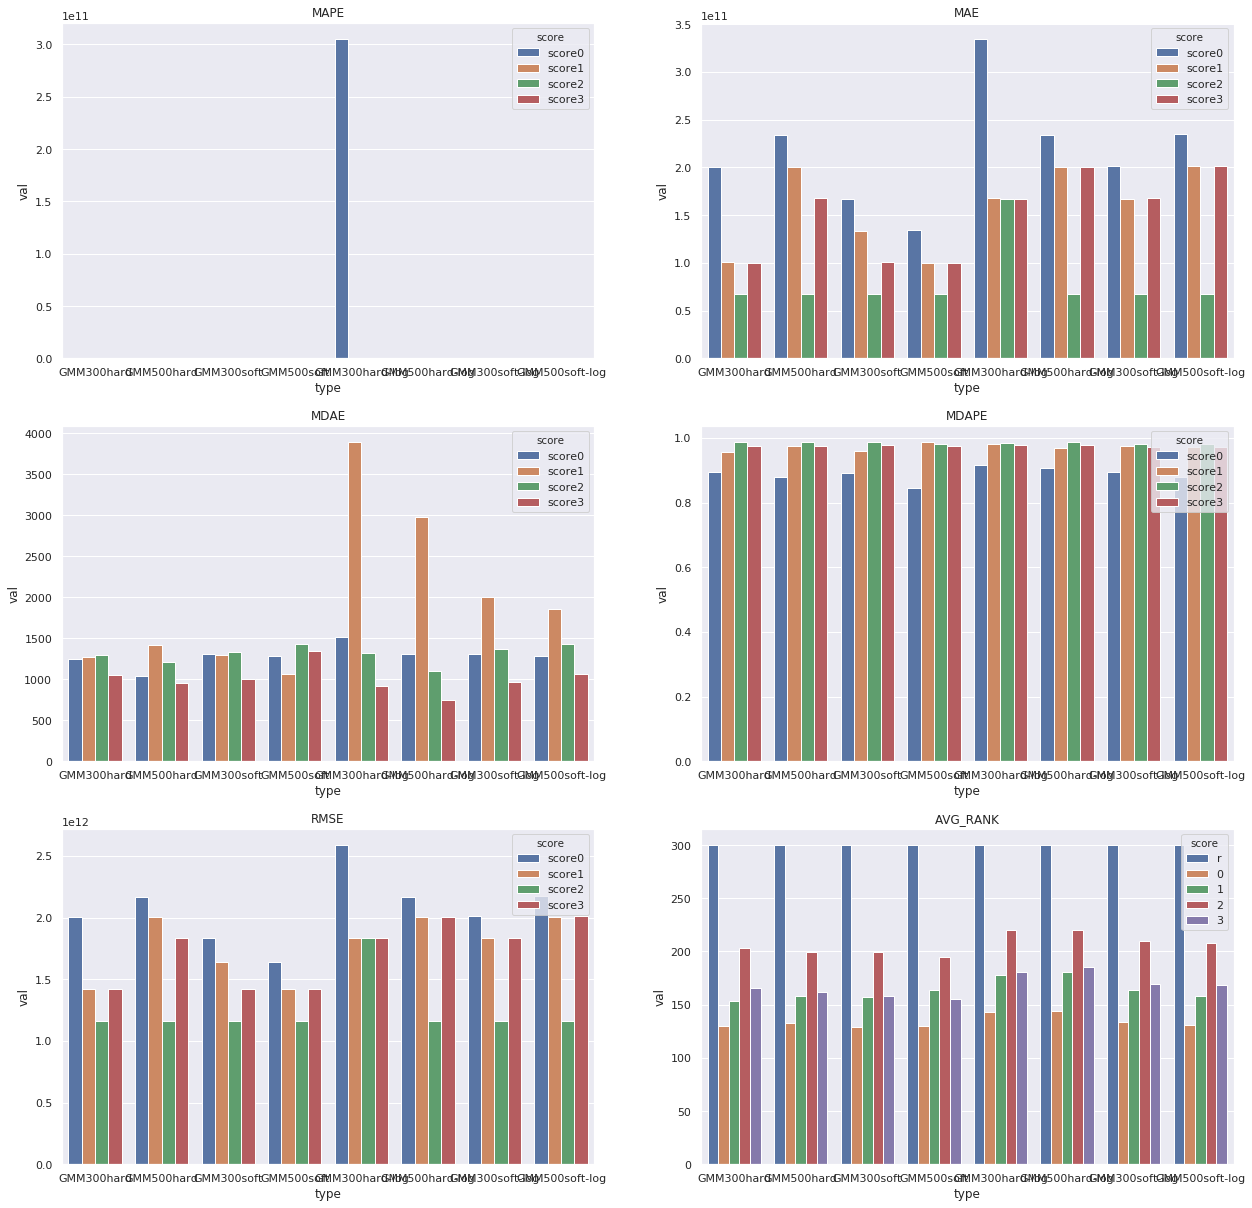

In [12]:
for gmm_name in gmms:

    idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/idx2vec_o_epoch1.dat'.format(gmm_name),'rb'))
    idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/idx2vec_i_epoch1.dat'.format(gmm_name),'rb'))
    trained_prototypes = pickle.load(open('../../data/wikipedia/save/1B30W/gmms_log/gmm-{}-rd-soft/trained_gmms_epoch1_{}.dat'.format(gmm_name, gmm_name),'rb'))
    gmm = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/gmm_log/gmm-{}-rd-soft.dat'.format(gmm_name),'rb'))

    e1.load_GMM(idx2vec_i, idx2vec_o, trained_prototypes, gmm, log_space=True)
    res_gmm['GMM'+gmm_name+'soft-log'] = e1.eval_all()
    
e1.draw(res_gmm)

# Numeral Tokens

In [13]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsTokenUnkNumeral30W/word2idx.dat','rb'))

In [14]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 600 
dataset examples: 
 [('95.1', ['tone', 'the', 'station', 'rebranded', 'as', 'the', 'edge', 'with', 'new', 'wedj']), ('1297.0', ['suppression', 'of', 'the', 'monastery', 'in', 'by', 'pope', 'boniface', 'viii', 'after']), ('873.0', ['julie', 'andrews', 'camelot', 'ran', 'for', 'performances', 'loewe', 'then', 'decided', 'to']), ('1462.0', ['historical', 'knights', 'of', 'columbus', 'council', 'braintree', 'historical', 'society', 'east', 'braintree']), ('6600.0', ['instructions', 'per', 'second', 'the', 'cdc', 'designed', 'by', 'seymour', 'cray', 'was'])] 
numeral examples : [9.5100000e+01 1.2970000e+03 8.7300000e+02 1.4620000e+03 6.6000000e+03
 7.3680000e-01 2.7300000e+00 4.1786000e+04 2.0112014e+07 1.3540000e+03] 
 


In [15]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/token/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/token/idx2vec_i_epoch1.dat','rb'))
e2.load_TOKEN(idx2vec_i, idx2vec_o)
res_toks = {}
res_token = e2.eval_all()
res_random = e2.eval_all(random=True)
res_toks['token'] = res_token
res_toks['random'] = res_random

oov: 0.7368
oov: 41786.0
oov: 20112014.0
oov: 69.99
oov: 1542271.0
oov: 55000000.0
oov: 12591.0
oov: 33977.0
oov: 34242.0
oov: 23.409
oov: 35228.0
oov: 479.8
oov: 3774270.0
oov: 7117.0
oov: 6676.0
oov: 522000.0
oov: 66.25
oov: 48557.0
oov: 914808.0
oov: 29.66
oov: 10083.0
oov: 92.82
oov: 208739.0
oov: 27915.0
oov: 483.96
oov: 20588.0
oov: 9904.0
oov: 29363.0
oov: 224.2
oov: 45339.0
oov: 48.07
oov: 49641.0
oov: 27306.0
oov: 2005.5
oov: 17562.0
oov: 50858.0
oov: 12435.0
oov: 76.22
oov: 40357.0
oov: 8123476.0
oov: 38423.0
oov: 57.77
oov: 12715.0
oov: 848000.0
oov: 5190741.0
oov: 185.99
oov: 0.1096
oov: 40227.0
oov: 0.9976
oov: 383.6
oov: 195.3
oov: 1023721.0
oov: 31296.0
oov: 22.5063
oov: 0.077
oov: 5924.0
oov: 4481.0
oov: 45731.0
oov: 1911973.0
oov: 34.3148
oov: 85825.0
oov: 112300.0
oov: 37589594.0
oov: 104400.0
oov: 20110629040718.0
oov: 77620.0
oov: 76.36
oov: 5613.0
oov: 48855.0
oov: 578937.0
oov: 46.6512
oov: 20081019041130.0
oov: 705498.0
oov: 4702961.0
oov: 9879.0
oov: 5541.0
oov:

In [16]:
e1.flod_score(res_toks, 0)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,1.63959e+12,129.183,1.33872e+11,9510.77,3117.5,0.963368,"[0.32666666666666666, 0.46166666666666667, 0.6...","[30, 60, 120, 180, 300, 420]"
random,2.59138e+12,129.183,1.67342e+11,5.67284e+08,3469.95,0.999924,"[0.32666666666666666, 0.46166666666666667, 0.6...","[30, 60, 120, 180, 300, 420]"


# Fixed

In [17]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeral30W/word2idx.dat','rb'))

In [18]:
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)

length of dataset: 600 
dataset examples: 
 [('95.1', ['tone', 'the', 'station', 'rebranded', 'as', 'the', 'edge', 'with', 'new', 'wedj']), ('1297.0', ['suppression', 'of', 'the', 'monastery', 'in', 'by', 'pope', 'boniface', 'viii', 'after']), ('873.0', ['julie', 'andrews', 'camelot', 'ran', 'for', 'performances', 'loewe', 'then', 'decided', 'to']), ('1462.0', ['historical', 'knights', 'of', 'columbus', 'council', 'braintree', 'historical', 'society', 'east', 'braintree']), ('6600.0', ['instructions', 'per', 'second', 'the', 'cdc', 'designed', 'by', 'seymour', 'cray', 'was'])] 
numeral examples : [9.5100000e+01 1.2970000e+03 8.7300000e+02 1.4620000e+03 6.6000000e+03
 7.3680000e-01 2.7300000e+00 4.1786000e+04 2.0112014e+07 1.3540000e+03] 
 


In [20]:
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B30W/FIXED/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B30W/FIXED/idx2vec_i_epoch1.dat','rb'))
e2.load_fixed(idx2vec_i, idx2vec_o)

In [21]:
res_fixed_test = e2.eval_all(varbose=False)

In [22]:
res_fixed_test

{'x': [30, 60, 120, 180, 300, 420],
 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
         0.7       ],
        [0.04833333, 0.09833333, 0.19833333, 0.29833333, 0.49833333,
         0.69833333],
        [0.05666667, 0.10666667, 0.20666667, 0.31      , 0.51      ,
         0.71      ],
        [0.06166667, 0.11666667, 0.22      , 0.325     , 0.53333333,
         0.725     ],
        [0.05833333, 0.10833333, 0.21166667, 0.31666667, 0.51833333,
         0.71666667]]),
 'RMSE': array([1.83365913e+12, 3.48326409e+12, 6.56810424e+12, 3.93744082e+12]),
 'mape': array([6.28614374e+09, 3.13680334e+11, 3.28388774e+11, 3.13694651e+11]),
 'mae': array([1.67389963e+11, 6.03518682e+11, 2.14533344e+12, 7.71107251e+11]),
 'mdae': array([3203. , 3314. , 3450.5, 3314. ]),
 'mdape': array([2.57567811, 2.72224935, 3.82173499, 2.86515836]),
 'avg_rank': [300.5,
  301.4816666666667,
  295.2733333333333,
  287.08666666666664,
  291.985]}

# LSTMnew

In [23]:
nc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/nc.dat','rb'))
idx2word = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/idx2word.dat','rb'))
wc = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/wc.dat','rb'))
word2idx = pickle.load(open('../../data/wikipedia/preprocess1B/NumeralAsNumeralLSTM30W/word2idx.dat','rb'))
e2 = Evaluator(
    filtered_dataset,
    wc,
    nc,
    idx2word,
    word2idx
)
idx2vec_o = pickle.load(open('../../data/wikipedia/save/1B/1/LSTMnew/idx2vec_o_epoch1.dat','rb'))
idx2vec_i = pickle.load(open('../../data/wikipedia/save/1B/1/LSTMnew/idx2vec_i_epoch1.dat','rb'))
LSTM_model_path = '../../data/wikipedia/save/1B/1/LSTMnew/sgns_epoch1.pt'
e2.load_LSTM(idx2vec_i, idx2vec_o, LSTM_model_path)
res_LSTMnew = e1.eval_all()
print(res_LSTMnew)

length of dataset: 600 
dataset examples: 
 [('95.1', ['tone', 'the', 'station', 'rebranded', 'as', 'the', 'edge', 'with', 'new', 'wedj']), ('1297.0', ['suppression', 'of', 'the', 'monastery', 'in', 'by', 'pope', 'boniface', 'viii', 'after']), ('873.0', ['julie', 'andrews', 'camelot', 'ran', 'for', 'performances', 'loewe', 'then', 'decided', 'to']), ('1462.0', ['historical', 'knights', 'of', 'columbus', 'council', 'braintree', 'historical', 'society', 'east', 'braintree']), ('6600.0', ['instructions', 'per', 'second', 'the', 'cdc', 'designed', 'by', 'seymour', 'cray', 'was'])] 
numeral examples : [9.5100000e+01 1.2970000e+03 8.7300000e+02 1.4620000e+03 6.6000000e+03
 7.3680000e-01 2.7300000e+00 4.1786000e+04 2.0112014e+07 1.3540000e+03] 
 
{'x': [30, 60, 120, 180, 300, 420], 'topk': array([[0.05      , 0.1       , 0.2       , 0.3       , 0.5       ,
        0.7       ],
       [0.33166667, 0.46333333, 0.61833333, 0.72833333, 0.86333333,
        0.93      ],
       [0.23      , 0.348333

In [24]:
merge_all = {}
for i in [res_toks, res_gmm, res_sz, res_sz_log]:
    for k, v in i.items():
        merge_all[k] = v
merge_all['LSTM'] = res_LSTM
merge_all['LSTM1'] = res_LSTMnew
merge_all['FIXED'] = res_fixed_test

In [29]:
e2.flod_score(merge_all,3)

,RMSE,avg_rank,mae,mape,mdae,mdape,topk,x
token,3.27928e+12,256.483,5.35505e+11,1.07281e+11,40343.9,10.9234,"[0.043333333333333335, 0.10333333333333333, 0....","[30, 60, 120, 180, 300, 420]"
random,2.45924e+12,256.483,1.67391e+11,1.74948e+09,4773.57,0.999986,"[0.043333333333333335, 0.10333333333333333, 0....","[30, 60, 120, 180, 300, 420]"
GMM300hard,1.41898e+12,165.955,1.00389e+11,5.28416e+06,1047.5,0.974451,"[0.235, 0.335, 0.5233333333333333, 0.636666666...","[30, 60, 120, 180, 300, 420]"
GMM500hard,1.83348e+12,162.282,1.6754e+11,7.22015e+08,954,0.975014,"[0.23333333333333334, 0.3566666666666667, 0.54...","[30, 60, 120, 180, 300, 420]"
GMM300soft,1.42016e+12,158.395,1.00654e+11,5.28783e+06,998,0.978154,"[0.24333333333333335, 0.365, 0.536666666666666...","[30, 60, 120, 180, 300, 420]"
GMM500soft,1.4185e+12,155.135,1.00454e+11,5.28375e+06,1339,0.974585,"[0.225, 0.37666666666666665, 0.555, 0.66333333...","[30, 60, 120, 180, 300, 420]"
GMM300hard-log,1.8333e+12,180.588,1.67374e+11,5.32136e+06,924,0.979156,"[0.17833333333333334, 0.305, 0.465, 0.59, 0.76...","[30, 60, 120, 180, 300, 420]"
GMM500hard-log,2.00723e+12,185.113,2.00824e+11,7.22005e+08,744.45,0.977492,"[0.175, 0.29, 0.44166666666666665, 0.56, 0.771...","[30, 60, 120, 180, 300, 420]"
GMM300soft-log,1.83402e+12,169.465,1.67622e+11,7.22017e+08,965.2,0.971671,"[0.22833333333333333, 0.34, 0.4933333333333333...","[30, 60, 120, 180, 300, 420]"
GMM500soft-log,2.01023e+12,168.192,2.01223e+11,7.23806e+08,1067.35,0.970197,"[0.21, 0.335, 0.49333333333333335, 0.63, 0.793...","[30, 60, 120, 180, 300, 420]"
